<a href="https://colab.research.google.com/github/fcmf/projeto-aprendizado-descritivo/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "violencia_domestica_2023.csv"
df = pd.read_csv(file_path, sep=",")


In [ ]:
def corrigir_data(valor):
    try:
        return pd.to_datetime(valor)
    except:
        try:
            num = float(valor)
            return pd.to_datetime("1899-12-30") + pd.to_timedelta(num, unit="D")
        except:
            return pd.NaT

df['data_fato_corrigida'] = df['data_fato'].apply(corrigir_data)
df['dia_da_semana'] = df['data_fato_corrigida'].dt.day_name()
df['fim_de_semana'] = df['dia_da_semana'].isin(['Saturday', 'Sunday']).map({True: 'Sim', False: 'Não'})

df['reincidencia'] = df.duplicated(subset=['municipio_fato', 'natureza_delito'], keep=False).astype(int)

In [ ]:
print(df.head())
print(df.info())
print(df.isnull().sum())
df.describe(include='all')

   _id  municipio_cod       municipio_fato            data_fato  mes   ano  \
0    1         310010  ABADIA DOS DOURADOS  2023-01-08 00:00:00    1  2023   
1    2         310010  ABADIA DOS DOURADOS  2023-01-13 00:00:00    1  2023   
2    3         310010  ABADIA DOS DOURADOS  2023-01-26 00:00:00    1  2023   
3    4         310010  ABADIA DOS DOURADOS  2023-01-27 00:00:00    1  2023   
4    5         310010  ABADIA DOS DOURADOS  2023-02-07 00:00:00    2  2023   

                                risp               rmbh  \
0  10º Departamento - Patos de Minas  3) Interior de MG   
1  10º Departamento - Patos de Minas  3) Interior de MG   
2  10º Departamento - Patos de Minas  3) Interior de MG   
3  10º Departamento - Patos de Minas  3) Interior de MG   
4  10º Departamento - Patos de Minas  3) Interior de MG   

                                  natureza_delito tentado_consumado  \
0                                          AMEACA         CONSUMADO   
1  DESCUMPRIMENTO DE MEDIDA PROTET

,_id,municipio_cod,municipio_fato,data_fato,mes,ano,risp,rmbh,natureza_delito,tentado_consumado,qtde_vitimas,data_fato_corrigida,dia_da_semana,fim_de_semana,reincidencia
count,61536.000000,61536.000000,61536,61536,61536.000000,61536.0,61536,61536,61536,61536,61536.000000,61536,61536,61536,61536.000000
unique,NaN,NaN,853,424,NaN,NaN,19,3,167,2,NaN,NaN,7,2,NaN
top,NaN,NaN,BELO HORIZONTE,2023-01-01 00:00:00,NaN,NaN,12º Departamento - Ipatinga,3) Interior de MG,AMEACA,CONSUMADO,NaN,NaN,Sunday,Não,NaN
freq,NaN,NaN,2705,260,NaN,NaN,5835,50484,17285,60951,NaN,NaN,11258,40660,NaN
mean,30768.500000,313681.674353,NaN,NaN,3.927701,2023.0,NaN,NaN,NaN,NaN,1.393314,2023-04-13 13:55:54.290171904,NaN,NaN,0.926807
min,1.000000,310010.000000,NaN,NaN,1.000000,2023.0,NaN,NaN,NaN,NaN,1.000000,2023-01-01 00:00:00,NaN,NaN,0.000000
25%,15384.750000,311860.000000,NaN,NaN,2.000000,2023.0,NaN,NaN,NaN,NaN,1.000000,2023-02-20 00:00:00,NaN,NaN,1.000000
50%,30768.500000,313670.000000,NaN,NaN,4.000000,2023.0,NaN,NaN,NaN,NaN,1.000000,2023-04-10 00:00:00,NaN,NaN,1.000000
75%,46152.250000,315400.000000,NaN,NaN,6.000000,2023.0,NaN,NaN,NaN,NaN,1.000000,2023-06-05 00:00:00,NaN,NaN,1.000000
max,61536.000000,317220.000000,NaN,NaN,7.000000,2023.0,NaN,NaN,NaN,NaN,32.000000,2023-07-31 00:00:00,NaN,NaN,1.000000


/tmp/ipython-input-4-469921672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_delitos.values, y=top_delitos.index, palette='viridis')


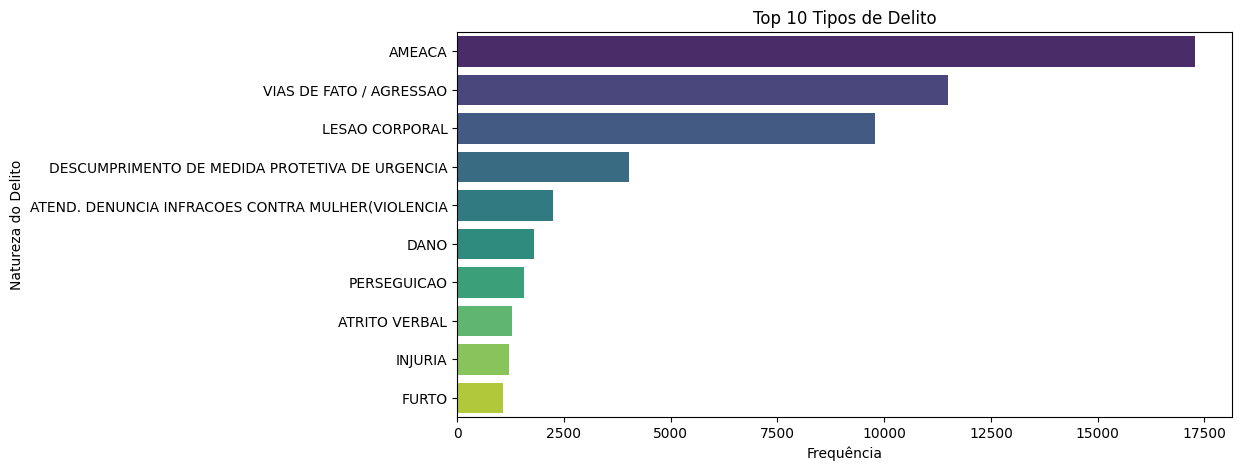

In [ ]:
plt.figure(figsize=(10,5))
top_delitos = df['natureza_delito'].value_counts().head(10)
sns.barplot(x=top_delitos.values, y=top_delitos.index, palette='viridis')
plt.title("Top 10 Tipos de Delito")
plt.xlabel("Frequência")
plt.ylabel("Natureza do Delito")
plt.show()

/tmp/ipython-input-5-694668824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='mes', palette='crest')


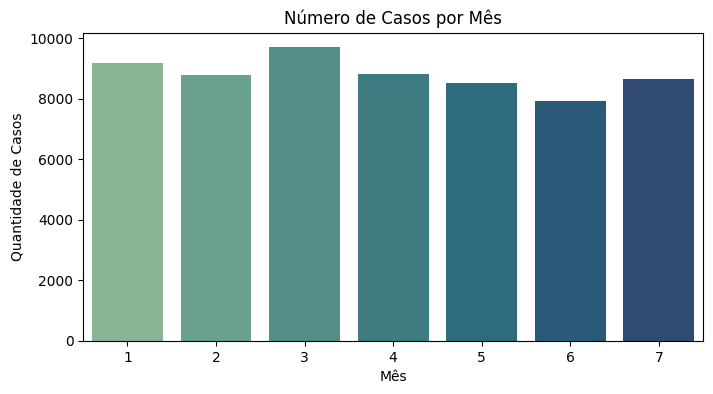

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='mes', palette='crest')
plt.title("Número de Casos por Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Casos")
plt.show()


/tmp/ipython-input-6-4084368330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='dia_da_semana', order=dias_ordem, palette='mako')


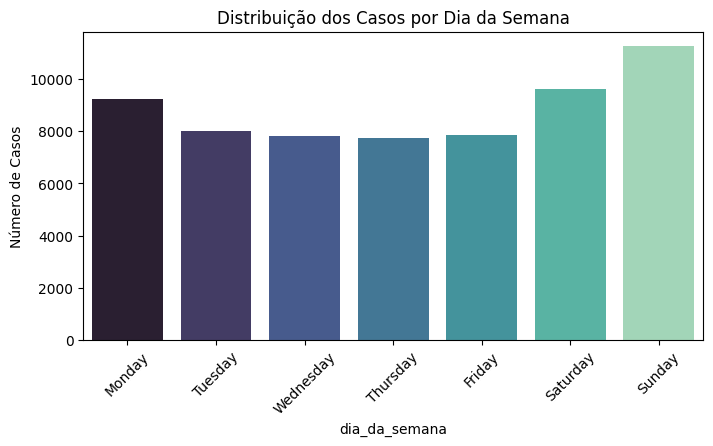

In [ ]:
plt.figure(figsize=(8,4))
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='dia_da_semana', order=dias_ordem, palette='mako')
plt.title("Distribuição dos Casos por Dia da Semana")
plt.ylabel("Número de Casos")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-7-1115984091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mun.values, y=top_mun.index, palette='flare')


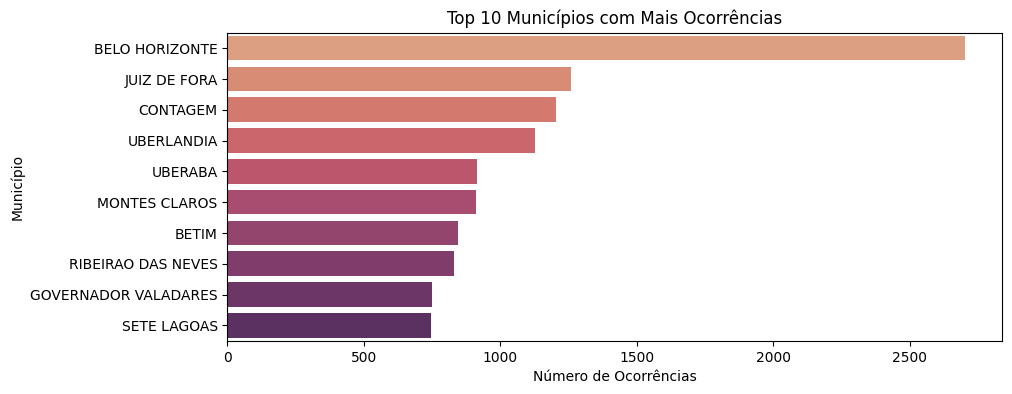

In [ ]:
top_mun = df['municipio_fato'].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=top_mun.values, y=top_mun.index, palette='flare')
plt.title("Top 10 Municípios com Mais Ocorrências")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Município")
plt.show()

/tmp/ipython-input-8-51185697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fim_de_semana', palette='Set1')


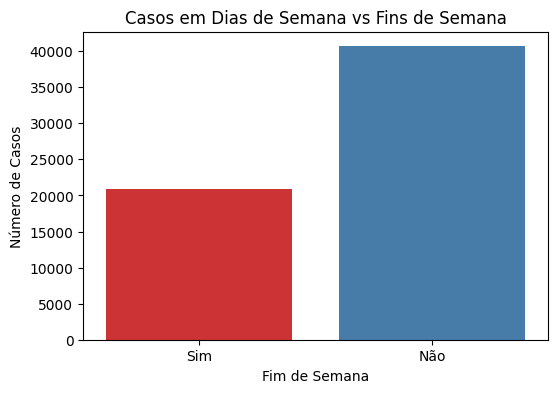

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='fim_de_semana', palette='Set1')
plt.title("Casos em Dias de Semana vs Fins de Semana")
plt.xlabel("Fim de Semana")
plt.ylabel("Número de Casos")
plt.show()



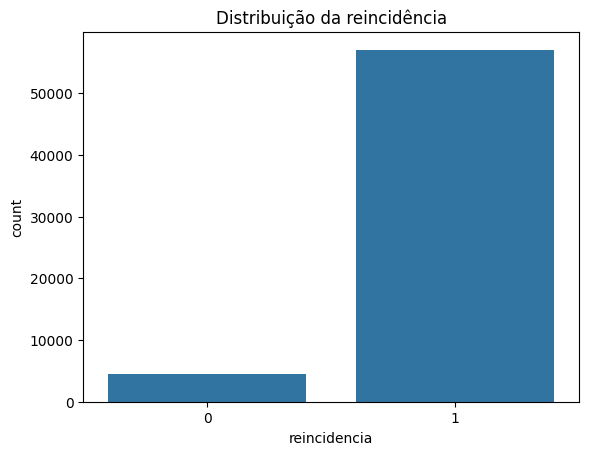

In [ ]:
sns.countplot(data=df, x='reincidencia')
plt.title("Distribuição da reincidência")
plt.show()

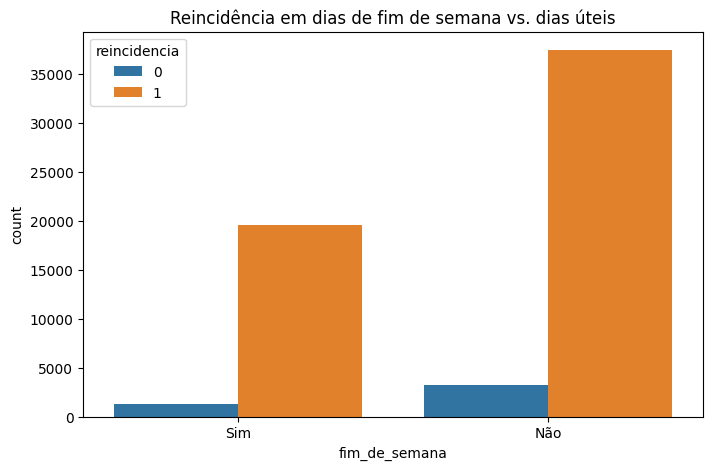

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='fim_de_semana', hue='reincidencia')
plt.title("Reincidência em dias de fim de semana vs. dias úteis")
plt.show()

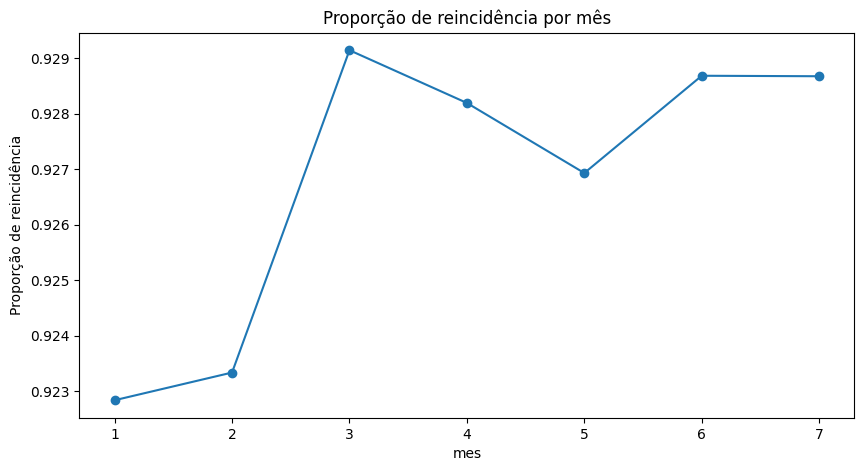

In [ ]:
reinc_por_mes = df.groupby('mes')['reincidencia'].mean().sort_index()
plt.figure(figsize=(10,5))
reinc_por_mes.plot(marker='o')
plt.title("Proporção de reincidência por mês")
plt.ylabel("Proporção de reincidência")
plt.show()